MUZZLE PATTERN BASED CATTLE IDENTIFICATION

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Found 4063 images belonging to 268 classes.
Found 880 images belonging to 268 classes.
Epoch 1/5
127/127 [==============================] - 3305s 26s/step - loss: 3.6434 - accuracy: 0.4743 - val_loss: 1.1336 - val_accuracy: 0.7557
Epoch 2/5
127/127 [==============================] - 3218s 25s/step - loss: 0.5967 - accuracy: 0.8863 - val_loss: 0.7244 - val_accuracy: 0.8489
Epoch 3/5
127/127 [==============================] - 3260s 26s/step - loss: 0.3801 - accuracy: 0.9225 - val_loss: 0.5117 - val_accuracy: 0.8966
Epoch 4/5
127/127 [==============================] - 3268s 26s/step - loss: 0.3005 - accuracy: 0.9424 - val_loss: 0.3522 - val_accuracy: 0.9136
Epoch 5/5
127/127 [==============================] - 3260s 26s/step - loss: 0.2272 - accuracy: 0.9542 - val_loss: 0.3452 - val_accuracy: 0.9182


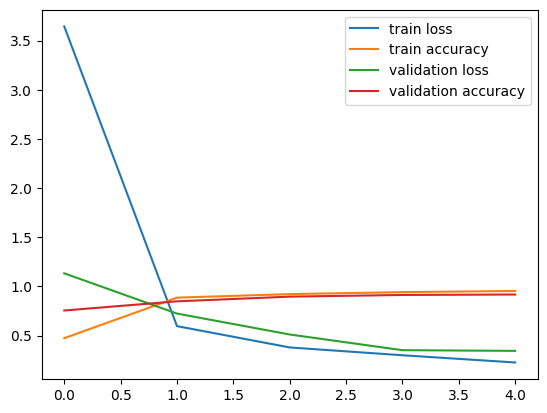

In [ ]:
from keras.layers import Flatten, Dense
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from google.colab import drive  # Import the Google Drive module
import os

# Mount Google Drive
drive.mount('/content/drive')

# Set the image size and other parameters
IMAGE_SIZE = [224, 224]
BATCH_SIZE = 32

# Path to dataset in Google Drive
data_path = '/content/drive/MyDrive/archive'

# Get the list of folders (classes) in your dataset
folders = os.listdir(data_path)

# Load the VGG16 model
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

# Freeze the layers of the VGG model
for layer in vgg.layers:
    layer.trainable = False

# Build the model
x = Flatten()(vgg.output)
prediction = Dense(len(folders), activation='softmax')(x)
model = Model(inputs=vgg.input, outputs=prediction)

# Compile the model
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

# Data augmentation for training
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)

# Load the dataset and split into train and test sets
train_generator = train_datagen.flow_from_directory(
    data_path,
    target_size=(224, 224),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training'
)

test_generator = train_datagen.flow_from_directory(
    data_path,
    target_size=(224, 224),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation'
)

# Train the model
history = model.fit(
    train_generator,
    validation_data=test_generator,
    epochs=5,
    steps_per_epoch=len(train_generator),
    validation_steps=len(test_generator)
)

# Plot training history
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_loss'], label='validation loss')
plt.plot(history.history['val_accuracy'], label='validation accuracy')
plt.legend()
plt.show()

# Save the trained model
model.save('/content/drive/MyDrive/cattle_muzzle_identification_model.h5')


In [ ]:
from google.colab import drive
drive.mount('/content/drive')
from keras.models import load_model

# Load the trained model
model_path = '/content/drive/MyDrive/cattle_muzzle_identification_model1.h5'
model = load_model(model_path)


Mounted at /content/drive


In [ ]:
from keras.preprocessing import image as keras_image
import numpy as np
from PIL import Image

def preprocess_image(image_path):
    img = Image.open(image_path)
    img = img.resize((224, 224))
    img_array = np.array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)
    return img_array


In [ ]:
def predict_cattle(image_path):
    img_array = preprocess_image(image_path)
    prediction = model.predict(img_array)[0]
    predicted_cattle_index = np.argmax(prediction)
    return predicted_cattle_index


In [ ]:
#total of 268 different cattles
num_cattles = 268

# Generate a list of cattle names using a list comprehension
all_cattles = [f'cattle-{i+1}' for i in range(num_cattles)]


# Create the idx_to_class mapping using a loop
idx_to_class = {i: cattle for i, cattle in enumerate(all_cattles)}

# Create the class_to_idx mapping using the reverse of idx_to_class
class_to_idx = {value: key for key, value in idx_to_class.items()}
def map_index_to_cattle(predicted_cattle_index):
    predicted_cattle = idx_to_class[predicted_cattle_index]
    return predicted_cattle

In [ ]:
image_path = '/content/drive/MyDrive/xyz4.jpg'  # Replace with actual image path

predicted_cattle_index = predict_cattle(image_path)
predicted_cattle = map_index_to_cattle(predicted_cattle_index)

print('Predicted cattle Index:', predicted_cattle_index)
print('Predicted cattle:', predicted_cattle)


1/1 [==============================] - 1s 828ms/step
Predicted cattle Index: 66
Predicted cattle: cattle-67
